# MODULE 5 - Correlation & Models

Once you’ve cleaned up your data and have grown tired of marveling at your sparkly, new dataset – it’s time to explore some of the patterns that might exist within your data. Determining how your variables interact is one of the most meaningful skills you will learn as a data scientist. 

Before diving into specific methods, it is important to understand the types of variables that make up your dataset, specifically independent and dependent variables. 

***************************************

## Types of Variables

* <B>An independent variable</B>, which is commonly represented by the value “x”, is a variable that can stand on its own and isn’t affected any other variables. As the analyst, you will typically choose independent variables that you think will influence change in your dependent variable. Independent variables are also commonly referred to as predictor or explanatory variables.  

* <B>A dependent variable</B>, which is commonly represented by the value “y”, depends on the independent variable(s). As an analyst, you are interested in observing the changes that take place with the dependent variable given changes in values of the independent variable. Dependent variables are also commonly referred to as outcome or target variables. 

The distinction between independent and dependent variables is an important concept to master, as several analytical techniques are simply designed to examine the influence of one or more independent variables on a dependent variable. 

<LEFT><img src='https://showme0-9071.kxcdn.com/files/313838/pictures/thumbs/1015857/last_thumb1374514146.jpg'></LEFT>


## A simple rule of thumb when determining which variables fall within each category: independent variable(s) cause a change in dependent variable(s), and it isn’t possible that the dependent variable(s) cause a change in the independent variable(s).

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt 
import seaborn as sns

%matplotlib inline

In [2]:
datafile = "datasets/gradedata.csv"
df = pd.read_csv(datafile)

df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


## Correlation

Correlation is a numeric measure that describes the direction and magnitude of a linear relationship between two numeric variables. 

* Positively correlated variables move in the same direction – as one variable increases or decreases the second variable increases or decreases in the same direction (i.e., increase in study time/increase in test scores). 

* Negatively correlated variables move in opposite directions – as one variable increases or decreases the second variable moves in the opposite direction (i.e., decrease in daily spending/increase in total savings). 

<LEFT><img src='https://www.emathzone.com/wp-content/uploads/2014/10/positive-negative-corrrelation.jpg'></LEFT>

Correlation values, also referred to as the correlation coefficient, range from -1 to 1 – variables that are positively correlated are closer to 1 and variables that are negatively correlated are closer to -1. 

In [3]:
#creates a table of correlation values
#notice only numeric variables are included in the table

df.corr()

,age,exercise,hours,grade
age,1.000000,-0.003643,-0.017467,-0.007580
exercise,-0.003643,1.000000,0.021105,0.161286
hours,-0.017467,0.021105,1.000000,0.801955
grade,-0.007580,0.161286,0.801955,1.000000


The strength of the relationship between variables is determined by the absolute value (value of a number disregarding the sign) of the correlation coefficient. 


* 1 - Perfect linear relationship
* .70 - Strong relationship
* .50 - Moderate relationship
* .30 - Weak relationship
* 0 - No linear relationship 

It is important to understand that correlation is not the same as causation. Identifying a correlation between two factors does not automatically mean one factor causes another factor to occur.

### What can we tell from the above table?

* Each variable is perfectly correlated to itself (as expected)
* "Grades" and "Hours of Study" are highly correlated
* "Grades" and "Hours of Exercise" are weakly correlated

## Correlation 2.0

Use a heatmap to better visualize your correlation matrix!

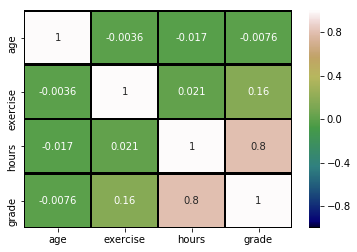

In [4]:
#show correlation of stats via heatmap
corr = df.corr()

sns.heatmap(corr,cmap="gist_earth", vmin=-1, annot=True, linewidths=1.5, linecolor='black')

# Introduction to Linear Regression 

<b>Regression is a type of predictive analysis.</b> It is a powerful statistical tool that examines the linear relationship between variables to predict the value of a continuous dependent variable given the value of one or more independent variables. 

Linear regression will allow you to determine the statistical significance of linear relationships, determine the magnitude and direction of those linear relationships, and assess how much of the variation in the dependent variable can be explained by the independent variable(s). Linear regression also allows you to predict the values of the dependent variable given different values of the independent variable(s). 

***************************************

A simple linear regression models the relationships between a single dependent and independent variable, <b>where the independent variable is predicting the value of the dependent variable</b>. A linear regression model is mathematically represented by the formula of a line:
### \begin{align}  y = mx + b \end{align}
Where “y” is the dependent variable, “m” is the slope (also known as the coefficient), “x” represents the value of the independent variable, and “b” is the y-intercept (also known as the constant) which is the value of “y” when the coefficient is equal to 0. <b>Linear regression analyses will determine the line-of-best-fit, also known as the regression line, which is the best fitting straight line through your data points.</b> Most commonly, the best fitting line is the line that minimizes errors. The equation for the regression line is what is used to make predictions for your dependent variable. 

<center><img src='https://s3.amazonaws.com/stackabuse/media/linear-regression-python-scikit-learn-1.png'></center>

***************************************

<b><u>SIMPLE LINEAR REGRESSION</u></b>
* One dependent variable
* One independent variable

<b><u>MULTIPLE LINEAR REGRESSION</u></b>
* One dependent variable
* One or more independent variables

<B>CONFOUNDING VARIABLES AND MULTIPLE LINEAR REGRESSION</B>

A <b>confounding</b> variable is an extra variable that can influence the results of your analyses. A confounding variable influences both the dependent and independent variable - without taking this variable(s) into consideration, you could incorrectly make assumptions about the relationship between your dependent variable and independent variable. 

<B>EXAMPLE</B> : 
You are a personal trainer and need to track the outcomes of your 100 clients. You have a dataset that includes your clients name, age, gender, number of training sessions, daily caloric intake, starting weight, current weight, weight(lbs) lost, BMI, and body fat percentage. 

You want to know if the number of training sessions influences weight loss. 'Number of sessions' is your Independent Variable and 'weight lost' is your dependent variable. We plug these variables into our linear regression model and find that there is a correlation between them - as the number of training sessions increases, weight loss also increases. 

HOWEVER, there are several other factors that may have an influence on this relationship. One confounding variable is the daily caloric intake of the clients. It's possible that men eat more than women, which would also mean that gender is a confounding variable. Not to mention, there was no mention of starting weight or age, both of which would influence the amount of weight lost. For example, if all your female clients were middle-aged, and all of the men were aged 16, age would have a direct effect on weight loss. Without controlling for all the potential confounding variables, you will not be able to accurately interpret the results of your analyses. 

***************************************

<b><U>MULTIPLE LINEAR REGRESSION</U></b>

Multiple linear regression allows you to include multiple independent variables in your regression equation. If you include all your potentially cofounding variables in the regression, you will be controlling for the effects of each variable. When you interpret the results of multiple linear regression you will say - "when looking at the relationship between number of training sessions and weight loss, holding all other variables constant..."

***************************************

<b><u>NOT</u> THE KITCHEN SINK!!</b>

Feature selection is the process in which you determine which variables should be included in your model. You do NOT want to throw ALL your variables in your model. This will result in a mess of interpretations, and is a lazy approach to analyses. You should select the variables that you believe have a relationship with your dependent variable, including your independent variable(s) of interest and any cofounding variables you want to control for. You can typically use common sense for this selection, but you should also rely on your correlation matrix - variables that are highly correlated to your dependent variable and to your independent variable(s) of interest. 

Source: [Stack Abuse](https://s3.amazonaws.com/stackabuse/media/linear-regression-python-scikit-learn-1.png)

## Preparing for Linear Regression 

#### What should you do before you attempt a linear regression?

* Fully explore your data (what does your data look like?)
* Clean your data (missing values, outliers, data anomolies, etc.)
* Determine what your research focus/question is - what do you want to find out?
* Determine your dependent variables of interest and the independent variables you think are related to the dependent variables
* Visual your data to identify any preliminary relatonships
* Determine which variables have a relationship via correlation matrix
* Determine which variables you think are best suited for your regression model (feature selection)

***************************************

## Preparing your variables

In order to run a linear regression analysis, your data must be in the appropriate format. Categorical variables cannot be included in your model without first being converted to binary variables (coded with 0/1). To do this, you can create <b>‘dummy variables’</b>, which are simply numeric variables that represent categorical data (i.e. race, gender, etc.).

In [5]:
df.head()

# we want to see if we should include gender in the model

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


In [6]:
# create a new dataset to hold your dummy variables
# use the pd.get_dummies function, specify the dataset, 
# and specify the variables you want to convert

modeldf = pd.get_dummies(data=df, columns=['gender'])
modeldf.head()

,fname,lname,age,exercise,hours,grade,address,gender_female,gender_male
0,Marcia,Pugh,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747",1,0
1,Kadeem,Morrison,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780",0,1
2,Nash,Powell,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060",0,1
3,Noelani,Wagner,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125",1,0
4,Noelani,Cherry,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035",1,0


In [7]:
reg_df = modeldf[['age','exercise','hours','grade','gender_female']]
reg_df.head()

,age,exercise,hours,grade,gender_female
0,17,3,10,82.4,1
1,18,4,4,78.2,0
2,18,5,9,79.3,0
3,14,2,7,83.2,1
4,18,4,15,87.4,1


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


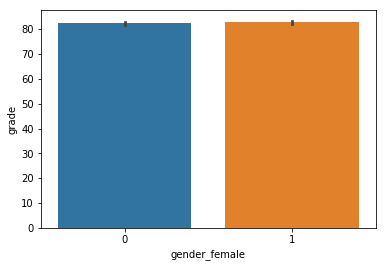

In [8]:
sns.barplot(x='gender_female', y='grade', data=reg_df)

In [9]:
pd.pivot_table(reg_df, values=['grade'], index=['gender_female'])

,grade
gender_female,
0,82.3948
1,82.7173


## Regression Library 

To run our linear regression model, we are using the <B>statsmodels library</B>. Statsmodels is a Python package that allows exploration of data, statistical modeling, and several other statistical functions. 

In [10]:
#use this library to build a statistical test for linear regression

import statsmodels.formula.api as smf

## What do we want to know?

What is the influence of hours of study on final grade? What is that relationship like when we control for age and hours of exercise? 

In [11]:
#OLS is Ordinary Least Squares, the most common type of linear regression
#the fit function uses the predictive values to calculate the best linear regression line

result = smf.ols('grade ~ age + exercise + hours', data=reg_df).fit()

#the summary will show the calculated values (slopes and y-intercept) for the linear regression formula
#the closer to 1 the adjusted r-squared value is, the better the fit of the linear regression line
#the p-value shows how statistically significant a predictive feature could be the model [ p <= 0.05 ] 

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1315.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:57:25   Log-Likelihood:                -6300.7
No. Observations:                2000   AIC:                         1.261e+04
Df Residuals:                    1996   BIC:                         1.263e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.8704      1.321     43.804      0.000      55.279      60.461
age            0.0397      0.075      0.532      0.595      -0.107       0.186
exercise       0.9893      0.089     11.131      0.000       0.815       1.164
hours          1.9165      0.031     61.564      0.000       1.855       1.978
==============================================================================
Omnibus:                      321.187   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2196.187
Skew:                          -0.567   Prob(JB):                         0.00
Kurtosis:                       8.007   Cond. No.                         213.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpreting Linear Regression Result

<b><u>Model Fit:</u></b> the adjusted R-squared reflects the overall fit of the model. Adjusted R-squared values range from 0 to 1, where a higher value generally indicates a better fit. Adjusted R-squared can be interpreted as the percentage of variation in the dependent variable that can be explained by the independent variable(s). 

***************************************

<b><u>Intercept:</u></b> the y-intercept, or constant, is the value given to the dependent variable if all independent variables are equal to 0. For example, when all independent variables are equal to 0, the expected grade is approximately 58.

***************************************

<b><u>Coefficients (coef):</u></b> also known as the slope coefficients, these values show how changes in the independent variable influence the dependent variable, and in what direction. Each coefficient represents the numeric change in the dependent variable given a one-unit change in the independent variable. For example, for every one hour increase in study time (hours), grade increases by 1.9 points. 
* INTERCEPT: when all other IV's are zero, expected grade is around 58
* AGE: for every one year increase in age, grade increases by 0.04 points
* EXERCISE: for every one hour increase in exercise, grade increases by approximately 1 point
* HOURS: for every one hour increase in study time, grade increases by 1.9 points

***************************************

<b><u>std err:</u></b> the standard error reflects the level of accuracy of the coefficients. The lower the value, the higher the level of accuracy. 

***************************************

<b><u>p-value (P>|t|):</u></b> as shown in the fourth column, the p-value shows if the linear relationship between the independent variable and the dependent variable is statistically significant. The p-value for each independent variable tests the null hypothesis that there is no correlation between the specific variable and the dependent variable. A commonly used significance cutoff value is 0.05 – which can be interpreted as ‘there is a 5% chance that the differences observed are just by chance’. If the observed p-value is less than 0.05, you can reject the null hypothesis and conclude that the effect is statistically significant. 

***************************************

### This is not a "one and done" situation! After you run your analyses, you can alter your model to determine if you can improve the overall fit. 

In [12]:
#remove age from regression, since it was not very correlated to other features

result = smf.ols('grade ~ exercise + hours', data=reg_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1973.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:57:26   Log-Likelihood:                -6300.8
No. Observations:                2000   AIC:                         1.261e+04
Df Residuals:                    1997   BIC:                         1.262e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.5316      0.447    130.828      0.000      57.654      59.409
exercise       0.9892      0.089     11.131      0.000       0.815       1.163
hours          1.9162      0.031     61.575      0.000       1.855       1.977
==============================================================================
Omnibus:                      318.721   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2158.000
Skew:                          -0.564   Prob(JB):                         0.00
Kurtosis:                       7.962   Cond. No.                         43.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Module 5 Exercises

### Exercise 1:

From the datasets folder, load the "tamiami.csv" file as a dataframe. Rename the columns (in order) to the following:

- location
- sales
- employees
- restaurants
- foodcarts
- price

Then do a correlation table on that dataframe. What features (columns) are correlated? What features aren't correlated?

### Exercise 2:

Using the dataframe from the previous exercise, choose features (columns) to create a linear regression formula to predict sales. Try it with and without the y-intercept. How does it make a difference? Does adding or removing features in your model formula make a difference in the output?